# Q.1) Exploratory Data Analysis & Data Preperation
## Understanding Data

In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
healthData = pd.read_csv('analytic_data2021.csv',low_memory=False)
healthData.shape

(3195, 690)

In [3]:
healthData.describe()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
count,3195,3195,3195,3195,3195,3195,3143,3134,3134,3134,...,3195,3195,3195,1,1,3188,3187,3187,1,1
unique,53,326,3195,53,1929,2,3,3133,1535,3118,...,3188,3081,3140,1,1,2463,3053,3134,1,1
top,48,000,01039,TX,Washington County,2021,1,7955.6615772,190,7566,...,0.5,6761,2530,v057_cilow,v057_cihigh,1,0,21720,v058_cilow,v058_cihigh
freq,255,52,1,255,30,3194,3081,2,11,2,...,7,3,3,1,1,697,30,3,1,1


## Required Data for Dataset (Taking all raw values, ranked counties and excluding attributes which do not change over government policies)

In [4]:
col = healthData.filter(regex="raw value$|^County Ranked",axis=1).columns

In [5]:
healthDataUpdated = healthData[col]

In [6]:
healthDataUpdated.describe()
healthDataUpdated.head()

,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,...,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,NaN,6906.6410942,0.1650958341,3.7419351474,4.0627918637,0.0815951602,0.1662246666,0.297,7.8,0.227,...,0.164691511,0.1253581154,0.0127592557,0.0594226491,0.0024583785,0.1845366958,0.601115369,0.0432660204,0.5075019531,0.1926902892
2,NaN,9819.8874313,0.2137580922,4.4169654739,4.8856364811,0.1031937927,0.1998983096,0.361,5.5,0.293,...,0.1733234622,0.2646799988,0.0070972235,0.0150341054,0.0010421797,0.0455373395,0.6528058803,0.011006831,0.5167392215,0.409631829
3,1,7830.0534837,0.1983917887,4.501498764,4.8502135182,0.0920177384,0.1981076587,0.33,6.7,0.306,...,0.1597307988,0.1986432548,0.0047611377,0.011741753,0.0010381428,0.029909252,0.7377078523,0.0080325135,0.5150799191,0.4200216232
4,1,7680.4772697,0.1646067529,3.6479777573,4.7682935308,0.0829200929,0.1851331826,0.3,7.8,0.247,...,0.2097798722,0.0860755978,0.0078034708,0.0106614584,0.0006898591,0.0471881523,0.8320730713,0.0070845825,0.5150962667,0.4227909911


In [7]:
# Dropping 0'th row
healthDataUpdated = healthDataUpdated.drop(index=0)

In [8]:
healthDataUpdated.head()

,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
1,NaN,6906.6410942,0.1650958341,3.7419351474,4.0627918637,0.0815951602,0.1662246666,0.297,7.8,0.227,...,0.164691511,0.1253581154,0.0127592557,0.0594226491,0.0024583785,0.1845366958,0.601115369,0.0432660204,0.5075019531,0.1926902892
2,NaN,9819.8874313,0.2137580922,4.4169654739,4.8856364811,0.1031937927,0.1998983096,0.361,5.5,0.293,...,0.1733234622,0.2646799988,0.0070972235,0.0150341054,0.0010421797,0.0455373395,0.6528058803,0.011006831,0.5167392215,0.409631829
3,1,7830.0534837,0.1983917887,4.501498764,4.8502135182,0.0920177384,0.1981076587,0.33,6.7,0.306,...,0.1597307988,0.1986432548,0.0047611377,0.011741753,0.0010381428,0.029909252,0.7377078523,0.0080325135,0.5150799191,0.4200216232
4,1,7680.4772697,0.1646067529,3.6479777573,4.7682935308,0.0829200929,0.1851331826,0.3,7.8,0.247,...,0.2097798722,0.0860755978,0.0078034708,0.0106614584,0.0006898591,0.0471881523,0.8320730713,0.0070845825,0.5150962667,0.4227909911
5,1,11476.629416,0.2984149992,5.5692666827,5.5904935124,0.1135531136,0.2553076754,0.412,5.5,0.28,...,0.1969132302,0.4782872883,0.0068864944,0.0046990197,0.0021064571,0.0452483189,0.4551162602,0.0189072131,0.4707931621,0.677896347


In [9]:
healthDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Data columns (total 80 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   County Ranked (Yes=1/No=0)                                   3142 non-null   object
 1   Premature death raw value                                    3133 non-null   object
 2   Poor or fair health raw value                                3194 non-null   object
 3   Poor physical health days raw value                          3194 non-null   object
 4   Poor mental health days raw value                            3194 non-null   object
 5   Low birthweight raw value                                    3089 non-null   object
 6   Adult smoking raw value                                      3194 non-null   object
 7   Adult obesity raw value                                      3194 non-null   object
 8 

### Including only the Health factors (ex. smoking) &
### Excluding outcome variables (ex. premature death, poor or fair health, poor mental health or low birthweight)

## Following factors are not included as they are either outcome or do not change over government rule

In [10]:
#  2   Premature death raw value                                    3133 non-null   object
#  3   Poor or fair health raw value                                3194 non-null   object
#  4   Poor physical health days raw value                          3194 non-null   object
#  5   Poor mental health days raw value                            3194 non-null   object
#  6   Low birthweight raw value                                    3089 non-null   object
#  13  Alcohol-impaired driving deaths raw value                    3160 non-null   object
#  30  Violent crime raw value                                      3003 non-null   object
#  31  Injury deaths raw value                                      3084 non-null   object
#  47  Drug overdose deaths raw value                               1791 non-null   object
#  48  Motor vehicle crash deaths raw value                         2742 non-null   object
#  55  Reading scores raw value                                     2826 non-null   object
#  56  Math scores raw value                                        2739 non-null   object
#  61  Homicides raw value                                          1352 non-null   object
#  62  Suicides raw value                                           2448 non-null   object
#  63  Firearm fatalities raw value                                 2291 non-null   object
#  64  Juvenile arrests raw value                                   1848 non-null   object
#  68  Broadband access raw value                                   3194 non-null   object

## Factors in Feature data

In [11]:
exclued = ['Premature death raw value','Poor or fair health raw value','Poor physical health days raw value','Poor mental health days raw value'
           ,'Low birthweight raw value','Alcohol-impaired driving deaths raw value','Violent crime raw value',
           'Injury deaths raw value','Drug overdose deaths raw value','Motor vehicle crash deaths raw value',
           'Reading scores raw value','Math scores raw value','Homicides raw value','Suicides raw value',
           'Firearm fatalities raw value','Juvenile arrests raw value','Broadband access raw value',]
# Excluding all the attributes that we don't want 
features = healthDataUpdated.drop(exclued,axis = 1).columns
# Setting Lable as 'Premature death raw value'
pred_labels = ['Premature death raw value']
exclued_cluster = ['Poor or fair health raw value','Poor physical health days raw value','Poor mental health days raw value'
           ,'Low birthweight raw value','Alcohol-impaired driving deaths raw value','Violent crime raw value',
           'Injury deaths raw value','Drug overdose deaths raw value','Motor vehicle crash deaths raw value',
           'Reading scores raw value','Math scores raw value','Homicides raw value','Suicides raw value',
           'Firearm fatalities raw value','Juvenile arrests raw value','Broadband access raw value',]
# Excluding all other attributes except 'Premature Death Raw Value' 
clust_attributes = healthDataUpdated.drop(exclued_cluster,axis = 1).columns

In [12]:
healthDataUpdated.describe()

,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
count,3142,3133,3194,3194,3194,3089,3194,3194,3175,3194,...,3194,3194,3194,3194,3194,3194,3194,3194,3194,3187
unique,2,3132,3192,3192,3192,2979,3192,328,83,309,...,3192,3181,3184,3177,2978,3193,3193,3019,3187,2462
top,1,7955.6615772,0.1650958341,3.2807504051,4.0627918637,0.0694444444,0.1662246666,0.34,7.7,0.264,...,0.1237592969,0,0.0034439928,0,0,0.1126136913,0.3746374419,0,0.5,1
freq,3081,2,2,2,2,5,2,33,150,32,...,2,11,2,7,204,2,2,173,7,697


In [13]:
healthDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 1 to 3194
Data columns (total 80 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   County Ranked (Yes=1/No=0)                                   3142 non-null   object
 1   Premature death raw value                                    3133 non-null   object
 2   Poor or fair health raw value                                3194 non-null   object
 3   Poor physical health days raw value                          3194 non-null   object
 4   Poor mental health days raw value                            3194 non-null   object
 5   Low birthweight raw value                                    3089 non-null   object
 6   Adult smoking raw value                                      3194 non-null   object
 7   Adult obesity raw value                                      3194 non-null   object
 8 

## Dealing with Missing Data
### Removing column attributes and rows in which above 30 % data is missing 

In [14]:
# Atribute Removed are (ex):
#  Disconnected youth raw value
#  Residential segregation - Black/White raw value 
#  Child mortality raw value           
#  Infant mortality raw value

healthDataUpdated = healthDataUpdated.dropna(axis=1,thresh = int(0.7*healthDataUpdated.shape[0])) 
healthDataUpdated = healthDataUpdated.dropna(axis=0,thresh = int(0.7*healthDataUpdated.shape[1])) 

# healthDataUpdated.describe()
healthDataUpdated.describe()

,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
count,3141,3133,3193,3193,3193,3089,3193,3193,3174,3193,...,3193,3193,3193,3193,3193,3193,3193,3193,3193,3186
unique,2,3132,3191,3191,3191,2979,3191,327,83,309,...,3191,3181,3184,3176,2977,3192,3192,3018,3186,2462
top,1,7955.6615772,0.1650958341,3.2807504051,4.0627918637,0.0694444444,0.1662246666,0.34,7.7,0.264,...,0.1237592969,0,0.0034439928,0,0,0.1126136913,0.3746374419,0,0.5,1
freq,3081,2,2,2,2,5,2,33,150,32,...,2,10,2,7,204,2,2,173,7,696


In [15]:
# Updating features after removing missing data values
features = set(features).intersection(set(healthDataUpdated.columns)) 

In [16]:
# Updating clust_attributes after removing missing data values
clust_attributes = set(clust_attributes).intersection(set(healthDataUpdated.columns)) 

In [17]:
len(features)

59

In [18]:
healthDataUpdated['County Ranked (Yes=1/No=0)'].value_counts()

1    3081
0      60
Name: County Ranked (Yes=1/No=0), dtype: int64

## Dropping counties which are not ranked (0 & null values)

In [19]:
healthDataUpdated.shape

(3193, 73)

In [20]:
healthDataUpdated[healthDataUpdated["County Ranked (Yes=1/No=0)"] == '0'].shape

(60, 73)

In [21]:
# Dropping unranked counties who have rank=0
healthDataUpdated = healthDataUpdated.drop(healthDataUpdated[healthDataUpdated["County Ranked (Yes=1/No=0)"] == '0'].index)
# Droppig Null/other values if any 
healthDataUpdated = healthDataUpdated.dropna(axis=0, how='any', thresh=None, subset=["County Ranked (Yes=1/No=0)"], inplace=False)

In [22]:
healthDataUpdated.shape

(3081, 73)

In [23]:
# Dropping counties column as no need of it anymore
healthDataUpdated = healthDataUpdated.drop(['County Ranked (Yes=1/No=0)'],axis=1)

In [24]:
# Updating fetaure and cluster attrinutes after updating ranked counties
features = set(features).intersection(set(healthDataUpdated.columns))
clust_attributes = set(clust_attributes).intersection(set(healthDataUpdated.columns))

In [25]:
healthDataUpdated.shape

(3081, 72)

## Type conversion from Object to Numbers (Floating values)

In [26]:
healthDataUpdated =healthDataUpdated.astype(np.float64,errors='ignore')

In [27]:
healthDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 3 to 3194
Data columns (total 72 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Premature death raw value                                    3081 non-null   float64
 1   Poor or fair health raw value                                3081 non-null   float64
 2   Poor physical health days raw value                          3081 non-null   float64
 3   Poor mental health days raw value                            3081 non-null   float64
 4   Low birthweight raw value                                    3031 non-null   float64
 5   Adult smoking raw value                                      3081 non-null   float64
 6   Adult obesity raw value                                      3081 non-null   float64
 7   Food environment index raw value                             3062 non-null   f

## Taking a Copy of Dataframe for Clustering

In [28]:
HealthDataForClustering = healthDataUpdated[list(clust_attributes)]

# Applying Imputer for remaining missing data 
## Replacing missing data with median as sample size is large 
## & using mean will deviate attribute values
### Scaling features
### Pipeline and Imputer

In [29]:
# Reference: https://towardsdatascience.com/clean-efficient-data-pipelines-with-pythons-sklearn-2472de04c0ea
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')), # Using Median as outliers will affect mean value
    ('std_scaler',StandardScaler()), #Feature Scaling
])

In [30]:
# NumpyArray
HealthDataForClustering_scaled = my_pipeline.fit_transform(HealthDataForClustering)

In [31]:
# Converison to df from NumpyArray
HealthDataForClustering_scaled_df = pd.DataFrame(HealthDataForClustering_scaled,columns=HealthDataForClustering.columns)

# Outlier Analysis

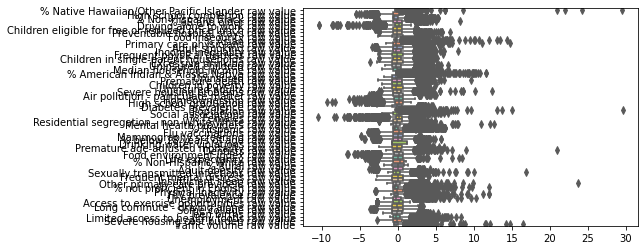

In [32]:
# Boxlot Outlier Analysis : Reference : https://seaborn.pydata.org/generated/seaborn.boxplot.html
%matplotlib inline
import seaborn as sns
ax = sns.boxplot(data=HealthDataForClustering_scaled_df, orient="h", palette="Set2")

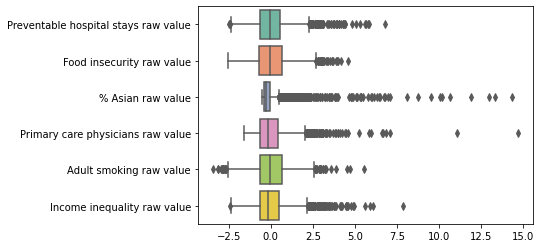

In [33]:
# Outlier Analysis for cluster attributes from column 6 to 12
clust_attributes = list(clust_attributes)
ax = sns.boxplot(data=HealthDataForClustering_scaled_df[clust_attributes[6:12]], orient="h", palette="Set2")

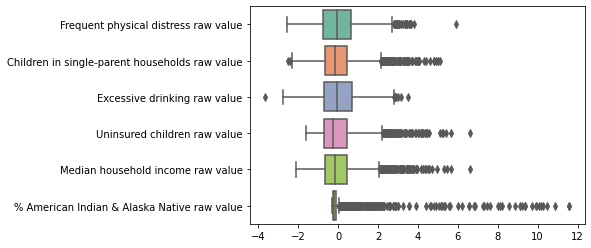

In [34]:
# Outlier Analysis for cluster attributes from column 12 to 18
ax = sns.boxplot(data=HealthDataForClustering_scaled_df[clust_attributes[12:18]], orient="h", palette="Set2")

In [35]:
# Correlation Matrix
core_matrix = HealthDataForClustering_scaled_df.corr()

# Summary Statistics

In [36]:
HealthDataForClustering_scaled_df.describe()

,% Native Hawaiian/Other Pacific Islander raw value,High school completion raw value,% Non-Hispanic Black raw value,% 65 and older raw value,Driving alone to work raw value,Children eligible for free or reduced price lunch raw value,Preventable hospital stays raw value,Food insecurity raw value,% Asian raw value,Primary care physicians raw value,...,Physical inactivity raw value,HIV prevalence raw value,Unemployment raw value,Access to exercise opportunities raw value,Long commute - driving alone raw value,Some college raw value,Teen births raw value,Limited access to healthy foods raw value,Severe housing cost burden raw value,Traffic volume raw value
count,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,...,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03,3.081000e+03
mean,9.945523e-18,6.716831e-17,2.270174e-18,6.727642e-16,1.223155e-15,2.334315e-16,2.564215e-16,3.562641e-16,1.283729e-19,8.923945e-17,...,-2.797449e-16,-4.125951e-16,1.447866e-16,-8.474639e-17,-3.813531e-16,-4.550347e-16,2.087118e-16,-2.652139e-17,-1.423183e-16,-1.137249e-16
std,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,...,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00
min,-3.024254e-01,-5.475343e+00,-6.346623e-01,-3.139095e+00,-1.035786e+01,-2.953545e+00,-2.523359e+00,-2.560729e+00,-5.484542e-01,-1.589170e+00,...,-3.040409e+00,-9.366376e-01,-1.775978e+00,-2.783260e+00,-2.545983e+00,-3.585612e+00,-1.951445e+00,-1.073600e+00,-2.710002e+00,-5.311311e-01
25%,-2.235138e-01,-5.988975e-01,-5.842547e-01,-6.350400e-01,-3.058935e-01,-6.570437e-01,-6.503581e-01,-6.998537e-01,-3.807329e-01,-6.324084e-01,...,-6.845740e-01,-5.011454e-01,-6.531211e-01,-6.300147e-01,-7.683547e-01,-6.893074e-01,-7.247079e-01,-6.058312e-01,-6.862850e-01,-4.374427e-01
50%,-1.524121e-01,2.144446e-01,-4.725421e-01,-6.316006e-02,1.841375e-01,-1.090523e-01,-8.069232e-02,-6.183935e-02,-2.846334e-01,-1.938978e-01,...,-5.293701e-02,-2.768176e-01,-1.989064e-01,1.242189e-01,-3.825740e-02,8.677965e-03,-1.086935e-01,-2.351706e-01,-1.313989e-01,-2.605395e-01
75%,-1.885510e-02,7.440953e-01,9.002168e-02,5.289106e-01,5.734982e-01,5.286627e-01,5.237445e-01,6.559268e-01,-3.970059e-02,4.476448e-01,...,6.811276e-01,9.669639e-02,4.267197e-01,7.388432e-01,6.759682e-01,7.203646e-01,6.070810e-01,2.780347e-01,5.638291e-01,4.789209e-02
max,2.947869e+01,1.954383e+00,5.336756e+00,8.178935e+00,1.797423e+00,2.515125e+00,6.820782e+00,4.563764e+00,1.435087e+01,1.468916e+01,...,4.044168e+00,1.194493e+01,1.031253e+01,1.609008e+00,3.278924e+00,2.823689e+00,5.248847e+00,8.283992e+00,5.787931e+00,1.651546e+01


## Scatter Matrix 

array([[<AxesSubplot:xlabel='% Native Hawaiian/Other Pacific Islander raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='High school completion raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='% Non-Hispanic Black raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='% 65 and older raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='Driving alone to work raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='Children eligible for free or reduced price lunch raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='Preventable hospital stays raw value', ylabel='% Native Hawaiian/Other Pacific Islander raw value'>,
        <AxesSubplot:xlabel='Food insecurity raw value', ylabel='% Native Hawaii

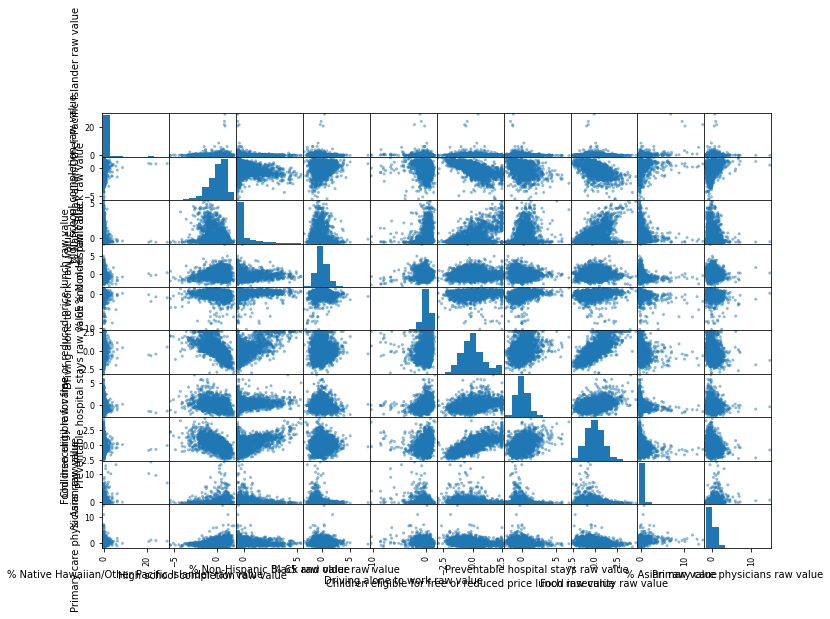

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(HealthDataForClustering_scaled_df[clust_attributes[:10]], figsize=(12,8))

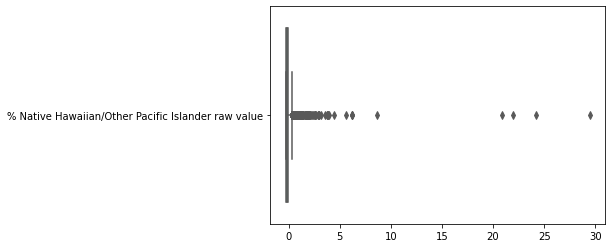

In [38]:
ax = sns.boxplot(data=HealthDataForClustering_scaled_df[clust_attributes[:1]], orient="h", palette="Set2")

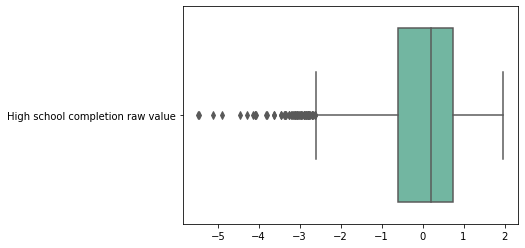

In [39]:
ax = sns.boxplot(data=HealthDataForClustering_scaled_df[clust_attributes[1:2]], orient="h", palette="Set2")

In [40]:
HealthDataForClustering_scaled_df.shape

(3081, 59)

# Droppig outliers beyond range 10% to 90%

In [41]:
# Reference: https://stackoverflow.com/questions/53337391/how-do-you-calculate-interquartile-range-iqr-correctly-using-python
for i in range(len(clust_attributes)):
    # IQR
    print("Entered in Loop")
    Q1 = np.percentile(HealthDataForClustering_scaled_df[clust_attributes[i]],10, interpolation = 'midpoint')
 
    Q3 = np.percentile(HealthDataForClustering_scaled_df[clust_attributes[i]],90,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    # Upper bound
    upper = np.where(HealthDataForClustering_scaled_df[clust_attributes[i]] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(HealthDataForClustering_scaled_df[clust_attributes[i]] <= (Q1-1.5*IQR))
    print(upper,lower)
    HealthDataForClustering_scaled_df = HealthDataForClustering_scaled_df.drop(upper[0],axis=0,errors='ignore')
    HealthDataForClustering_scaled_df = HealthDataForClustering_scaled_df.drop(lower[0],axis=0,errors='ignore')
    print('completed')
    

Entered in Loop
-0.26667313790553937 0.24562065395264665 0.512293791858186
(array([   5,   24,   67,   68,   72,   75,   78,   83,   85,   88,   89,
        110,  114,  167,  173,  178,  182,  187,  188,  199,  208,  215,
        218,  220,  222,  229,  231,  238,  380,  404,  467,  476,  538,
        539,  540,  541,  789,  809,  827,  868,  908, 1314, 1378, 1531,
       1544, 1556, 1565, 1568, 1699, 1715, 1724, 1727, 1866, 2054, 2104,
       2112, 2133, 2146, 2188, 2190, 2195, 2197, 2312, 2487, 2522, 2640,
       2721, 2733, 2735, 2738, 2740, 2742, 2897, 2898, 2908, 2909, 2918,
       2922, 2923, 2925, 3036], dtype=int64),) (array([], dtype=int64),)
completed
Entered in Loop
-1.3126942081432458 1.0765637164501642 2.38925792459341
(array([], dtype=int64),) (array([2521, 2588, 2612], dtype=int64),)
completed
Entered in Loop
-0.6051550195888018 1.4554660404443407 2.0606210600331423
(array([  29,   41, 1357, 1360, 1372, 1373, 1378, 1418, 2804], dtype=int64),) (array([], dtype=int64),)
co

In [42]:
HealthDataForClustering_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 3080
Data columns (total 59 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   % Native Hawaiian/Other Pacific Islander raw value           2331 non-null   float64
 1   High school completion raw value                             2331 non-null   float64
 2   % Non-Hispanic Black raw value                               2331 non-null   float64
 3   % 65 and older raw value                                     2331 non-null   float64
 4   Driving alone to work raw value                              2331 non-null   float64
 5   Children eligible for free or reduced price lunch raw value  2331 non-null   float64
 6   Preventable hospital stays raw value                         2331 non-null   float64
 7   Food insecurity raw value                                    2331 non-null   f

# Taking df excluding Premature death raw value 

In [43]:
df = HealthDataForClustering_scaled_df[list(features)]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 3080
Data columns (total 58 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   % Native Hawaiian/Other Pacific Islander raw value           2331 non-null   float64
 1   High school completion raw value                             2331 non-null   float64
 2   % Non-Hispanic Black raw value                               2331 non-null   float64
 3   % 65 and older raw value                                     2331 non-null   float64
 4   Driving alone to work raw value                              2331 non-null   float64
 5   Children eligible for free or reduced price lunch raw value  2331 non-null   float64
 6   Preventable hospital stays raw value                         2331 non-null   float64
 7   Food insecurity raw value                                    2331 non-null   f

# Q.2) Using Unsupervised Learning Algorithm to determine groups/clusters

# Clustering Using K-means Algorithm

In [45]:
from sklearn.cluster import KMeans

# Finding Number of Clusters Using Elbow Method

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


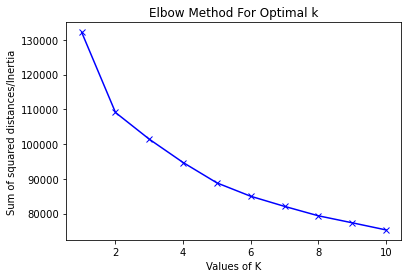

In [46]:
# Reference: https://www.kaggle.com/prashant111/k-means-clustering-with-python
import matplotlib.pyplot as plt 
Sum_of_squared_distances = []
K = range(1,11)
for num_clusters in K :
 kmeans =  KMeans(n_clusters=num_clusters,init = 'k-means++',max_iter = 300,random_state = 0)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

# Validating Using silhouette Method

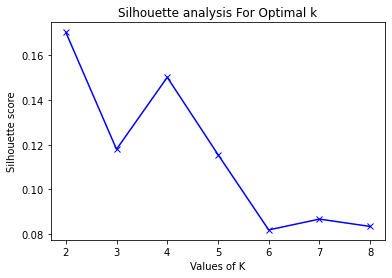

In [47]:
# Reference: https://www.kaggle.com/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df, cluster_labels)) 
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [48]:
#Computing cluster centers and predicting cluster index for each sample
kmeans =  KMeans(n_clusters=2,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0)
kmeans.fit_predict(df)

array([1, 0, 1, ..., 0, 0, 0])

In [49]:
HealthDataForClustering_scaled_df['labels'] = kmeans.labels_
df['labels']=kmeans.labels_

<ipython-input-49-2731ddeabcbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels']=kmeans.labels_


### Plotting the k-means clutsers

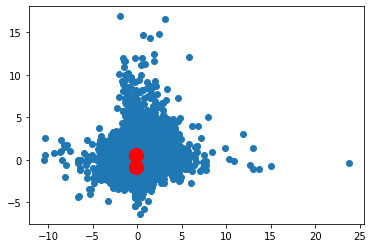

In [50]:
# Reference: https://www.askpython.com/python/examples/plot-k-means-clusters-python
X = np.array(df.loc[:,list(features)]).reshape(-1, 2)
pred_y = kmeans.fit_predict(df)
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [51]:
dataGroup=df.groupby(df.labels)

## From both the above methods found that data points form 2 clusters. 
## Thus, we have 2 set of groups of counties belonging to either group.

### Group 1

In [52]:
dataGroup.get_group(0)

,% Native Hawaiian/Other Pacific Islander raw value,High school completion raw value,% Non-Hispanic Black raw value,% 65 and older raw value,Driving alone to work raw value,Children eligible for free or reduced price lunch raw value,Preventable hospital stays raw value,Food insecurity raw value,% Asian raw value,Primary care physicians raw value,...,HIV prevalence raw value,Unemployment raw value,Access to exercise opportunities raw value,Long commute - driving alone raw value,Some college raw value,Teen births raw value,Limited access to healthy foods raw value,Severe housing cost burden raw value,Traffic volume raw value,labels
1,-0.142405,0.637510,-0.039211,0.282702,0.527361,-0.806032,-0.668323,-0.088423,-0.178485,0.453628,...,-0.074977,-0.869614,0.454436,0.660097,0.782232,-0.142689,-0.367077,0.062834,-0.078195,0
38,-0.157339,0.079181,0.047929,0.180672,1.166197,-0.369103,0.299471,0.443255,-0.264791,-0.139793,...,-0.432037,-0.508048,0.093325,-0.062065,-0.027682,-0.457555,-0.417399,-0.013401,0.017694,0
40,-0.095194,0.649955,0.937542,-1.537160,0.428994,-0.559193,-0.062148,0.602759,0.898304,-0.097660,...,0.238204,-0.876166,0.192459,-0.244589,1.385434,-0.928856,0.521878,1.388175,0.153513,0
76,0.404819,0.942483,-0.589536,-0.274433,-1.440468,-0.944226,-0.080692,0.177416,0.096422,0.599026,...,-0.276818,1.874362,1.609008,-1.387350,0.165717,-0.692618,-0.313553,0.361331,-0.390103,0
77,0.531905,0.957894,-0.572057,-0.671987,-2.113437,-0.726840,-0.846815,-0.035255,2.279892,1.548078,...,-0.276818,1.484013,1.609008,-1.990474,0.355198,-0.508781,-0.863395,0.800648,0.227430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,0.075566,0.960410,-0.555638,-1.418738,-0.620508,-1.074480,-1.206115,-0.407430,-0.177205,-0.439694,...,-0.673916,-0.083444,1.156004,-1.212762,0.409405,0.103646,0.338987,-0.734477,0.212068,0
3077,0.023806,1.351538,-0.595131,-0.807753,-1.587537,-1.910279,-0.836383,-0.992277,0.035722,1.563800,...,-0.646492,-0.871989,1.596631,-1.260377,1.829755,-1.403378,-0.108529,-0.123816,-0.044155,0
3078,0.053096,0.953040,-0.594783,-0.995689,-0.572746,-1.090793,-1.034578,0.071080,-0.376885,-0.155135,...,-0.276818,-0.073364,0.907052,-0.982622,-0.268082,-0.012488,0.193346,-1.410179,-0.098495,0
3079,-0.124109,0.466679,-0.604253,0.534749,-0.344934,-0.690997,-0.386678,-0.168175,-0.263906,-0.112469,...,-0.276818,-0.055849,0.870357,-2.014282,0.198810,-0.334707,-0.601893,-1.397460,-0.270306,0


### Group 2

In [53]:
dataGroup.get_group(1)

,% Native Hawaiian/Other Pacific Islander raw value,High school completion raw value,% Non-Hispanic Black raw value,% 65 and older raw value,Driving alone to work raw value,Children eligible for free or reduced price lunch raw value,Preventable hospital stays raw value,Food insecurity raw value,% Asian raw value,Primary care physicians raw value,...,HIV prevalence raw value,Unemployment raw value,Access to exercise opportunities raw value,Long commute - driving alone raw value,Some college raw value,Teen births raw value,Limited access to healthy foods raw value,Severe housing cost burden raw value,Traffic volume raw value,labels
0,-0.061617,0.264218,0.744041,-0.779775,0.810219,-0.391914,1.173963,0.629343,-0.140997,-0.227960,...,0.259046,-0.868082,0.253120,0.493444,0.219366,-0.312371,0.488225,0.697316,-0.005339,1
2,0.186189,-2.230886,2.689820,0.009560,0.298148,0.343170,0.399728,2.304130,-0.385391,-0.653212,...,1.579783,-0.148719,-0.448033,-0.093808,-1.900192,0.697629,0.325225,0.955168,-0.183781,1
3,-0.033113,-1.278023,0.828114,-0.631904,0.987201,0.472314,1.197144,0.496423,-0.474074,-0.029734,...,0.285373,-0.642496,-2.069457,1.580654,-1.514776,0.748483,-0.734742,-0.637284,-0.440992,1
4,-0.033665,-1.044358,-0.533204,-0.200688,1.051616,-0.228914,-0.106771,0.097664,-0.437435,-0.985239,...,-0.504985,-0.908151,-2.096552,2.048869,-0.185105,0.253200,-0.698465,-0.908046,-0.384307,1
6,-0.207008,-0.301052,2.467378,0.249083,0.846487,0.895503,1.996878,1.559780,-0.050628,-0.849600,...,0.885409,-0.247353,-0.649507,-0.117616,-1.500722,0.683724,-0.692477,-0.113710,-0.334424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,-0.302425,-0.117169,-0.605798,0.761340,0.707161,-0.049155,-0.320613,0.576175,-0.428675,-0.064116,...,-0.711213,2.174480,-0.276306,0.429957,-1.622129,0.687203,1.516773,-0.986046,0.186223,1
2983,-0.262576,-0.654762,-0.607050,0.253058,0.643154,-0.159918,-0.311920,0.576175,-0.447110,-1.089865,...,-0.276818,2.590894,-0.795715,2.961490,-0.516714,0.231795,-1.053553,-1.727370,-0.530807,1
2984,-0.196885,0.481632,-0.554817,0.268367,0.347712,-0.351375,0.988518,-0.008671,-0.341536,0.899913,...,-0.544475,0.723333,0.217065,-0.966751,0.391226,0.780222,-0.213486,-0.284174,0.235856,1
2985,-0.291051,-1.093477,-0.588999,0.498954,0.549578,-0.238378,2.261718,1.320525,-0.487198,-0.748908,...,-0.604808,1.977247,-0.075101,1.318771,-1.784624,0.755602,-0.590396,-0.690654,-0.500173,1


In [54]:
df.describe()

,% Native Hawaiian/Other Pacific Islander raw value,High school completion raw value,% Non-Hispanic Black raw value,% 65 and older raw value,Driving alone to work raw value,Children eligible for free or reduced price lunch raw value,Preventable hospital stays raw value,Food insecurity raw value,% Asian raw value,Primary care physicians raw value,...,HIV prevalence raw value,Unemployment raw value,Access to exercise opportunities raw value,Long commute - driving alone raw value,Some college raw value,Teen births raw value,Limited access to healthy foods raw value,Severe housing cost burden raw value,Traffic volume raw value,labels
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,...,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,-0.089641,-0.025227,0.010126,0.016636,0.024908,0.011325,0.025426,-0.001190,-0.058532,-0.018135,...,0.018218,-0.001023,-0.014164,0.024654,-0.026710,0.016127,0.002548,-0.024392,-0.017109,0.444873
std,0.216155,1.025769,1.013349,1.005318,0.970871,0.989100,1.004710,0.990657,0.771064,1.008913,...,1.064150,0.992672,0.992549,0.998201,1.008844,1.014096,1.021993,0.993626,0.982313,0.497058
min,-0.302425,-5.475343,-0.634503,-2.878650,-10.357858,-2.945726,-2.523359,-2.507561,-0.548454,-1.589170,...,-0.936638,-1.645701,-2.783260,-2.545983,-3.585612,-1.951445,-1.073600,-2.397993,-0.531131,0.000000
25%,-0.225553,-0.643045,-0.586110,-0.625199,-0.262492,-0.619720,-0.621382,-0.699854,-0.379876,-0.653155,...,-0.514583,-0.652314,-0.633906,-0.736611,-0.720218,-0.722080,-0.614222,-0.695001,-0.436116,0.000000
50%,-0.156904,0.200722,-0.469303,-0.051600,0.196346,-0.109052,-0.073738,-0.061839,-0.289953,-0.193898,...,-0.276818,-0.203040,0.113828,-0.030322,-0.017441,-0.108694,-0.228800,-0.147702,-0.265084,0.000000
75%,-0.033658,0.737935,0.094162,0.550941,0.572312,0.506813,0.541420,0.629343,-0.062751,0.415500,...,0.109311,0.431633,0.715027,0.711680,0.699682,0.634517,0.273771,0.518929,0.039757,1.000000
max,1.012988,1.954383,5.279701,8.178935,1.797423,2.515125,6.820782,4.563764,12.991942,14.689159,...,11.944934,10.312525,1.609008,3.278924,2.823689,5.248847,8.283992,5.787931,16.515456,1.000000


# Q.3) Five most important factors predicting premature death as shown by this data

In [55]:
from pandas.plotting import scatter_matrix

In [56]:
core_matrix = HealthDataForClustering_scaled_df.corr()

In [57]:
core_matrix['Premature death raw value'].sort_values(ascending=False)

Premature death raw value                                      1.000000
Premature age-adjusted mortality raw value                     0.949755
Frequent physical distress raw value                           0.728659
Food insecurity raw value                                      0.710767
Frequent mental distress raw value                             0.704813
Children in poverty raw value                                  0.702168
Adult smoking raw value                                        0.690514
Teen births raw value                                          0.657881
labels                                                         0.617634
Children eligible for free or reduced price lunch raw value    0.608062
Insufficient sleep raw value                                   0.574379
Children in single-parent households raw value                 0.543394
Diabetes prevalence raw value                                  0.520045
Physical inactivity raw value                                  0

# Important Factors Influencing Premature Deaths

In [58]:
# from above corelation matrix we have found following coorelated attributes of premature deaths
attributes = ['Premature age-adjusted mortality raw value',
              'Frequent physical distress raw value',
              'Frequent mental distress raw value',
              'Food insecurity raw value',
              'Children in poverty raw value']
features_1 = attributes
features_1


['Premature age-adjusted mortality raw value',
 'Frequent physical distress raw value',
 'Frequent mental distress raw value',
 'Food insecurity raw value',
 'Children in poverty raw value']

### Validatingt the relation using ScatterPlot Matrix

array([[<AxesSubplot:xlabel='Premature age-adjusted mortality raw value', ylabel='Premature age-adjusted mortality raw value'>,
        <AxesSubplot:xlabel='Frequent physical distress raw value', ylabel='Premature age-adjusted mortality raw value'>,
        <AxesSubplot:xlabel='Frequent mental distress raw value', ylabel='Premature age-adjusted mortality raw value'>,
        <AxesSubplot:xlabel='Food insecurity raw value', ylabel='Premature age-adjusted mortality raw value'>,
        <AxesSubplot:xlabel='Children in poverty raw value', ylabel='Premature age-adjusted mortality raw value'>],
       [<AxesSubplot:xlabel='Premature age-adjusted mortality raw value', ylabel='Frequent physical distress raw value'>,
        <AxesSubplot:xlabel='Frequent physical distress raw value', ylabel='Frequent physical distress raw value'>,
        <AxesSubplot:xlabel='Frequent mental distress raw value', ylabel='Frequent physical distress raw value'>,
        <AxesSubplot:xlabel='Food insecurity raw va

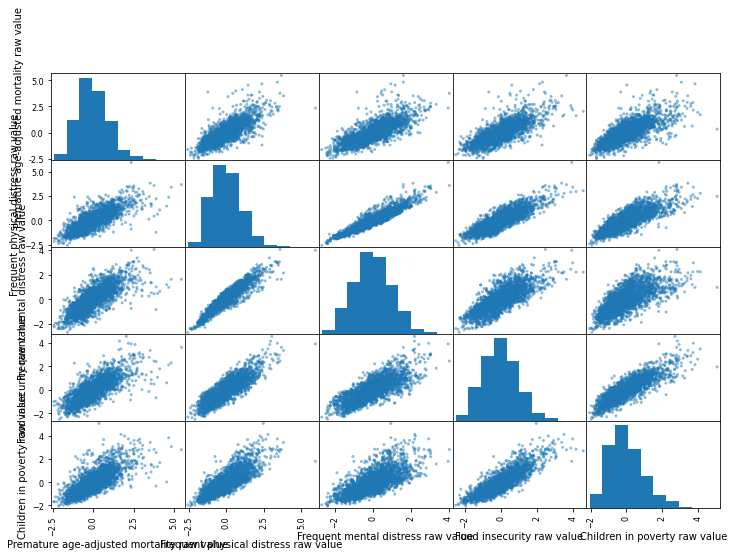

In [59]:
scatter_matrix(HealthDataForClustering_scaled_df[attributes], figsize=(12,8))

### From, Scatter Matrix can confirm the postive correlation of the influence factors we selected w.r.t. Premature Death

# Q.3) Develop two models (using different supervised learning approaches) 

# Splitting the data in train and test

In [60]:
# Reference: https://realpython.com/train-test-split-python-data/
# Dividing the data set into 20% Test, 80% Training
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(healthDataUpdated, test_size=0.2,random_state=42)

In [61]:
healthDataTraining =train_set

In [62]:
healthDataTesting=test_set

In [63]:
healthDataTraining_scaled = my_pipeline.fit_transform(healthDataTraining)

In [64]:
healthDataTraining_scaled_df = pd.DataFrame(healthDataTraining_scaled,columns=healthDataTraining.columns)

In [90]:
healthDataTraining_scaled_df.describe()
healthDataUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 3 to 3194
Data columns (total 72 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Premature death raw value                                    3081 non-null   float64
 1   Poor or fair health raw value                                3081 non-null   float64
 2   Poor physical health days raw value                          3081 non-null   float64
 3   Poor mental health days raw value                            3081 non-null   float64
 4   Low birthweight raw value                                    3031 non-null   float64
 5   Adult smoking raw value                                      3081 non-null   float64
 6   Adult obesity raw value                                      3081 non-null   float64
 7   Food environment index raw value                             3062 non-null   f

# Model Selection for our Problem
## Model 1: LinearRegression

In [66]:
features_X = healthDataTraining_scaled_df[list(features)]
label_Y = healthDataTraining_scaled_df[pred_labels]

Feature: 0, Score: 0.03059
Feature: 1, Score: 0.04258
Feature: 2, Score: 0.45983
Feature: 3, Score: 0.10613
Feature: 4, Score: -0.02792
Feature: 5, Score: -0.02356
Feature: 6, Score: -0.02742
Feature: 7, Score: -0.15872
Feature: 8, Score: 0.07353
Feature: 9, Score: 0.01539
Feature: 10, Score: 0.04437
Feature: 11, Score: -0.00209
Feature: 12, Score: -0.07373
Feature: 13, Score: 0.00200
Feature: 14, Score: -0.03763
Feature: 15, Score: -0.10811
Feature: 16, Score: 0.03944
Feature: 17, Score: 0.31668
Feature: 18, Score: 0.74485
Feature: 19, Score: 0.03439
Feature: 20, Score: -0.66756
Feature: 21, Score: 0.05202
Feature: 22, Score: -0.04007
Feature: 23, Score: 0.00318
Feature: 24, Score: -0.00156
Feature: 25, Score: 0.00080
Feature: 26, Score: 0.00554
Feature: 27, Score: -0.01219
Feature: 28, Score: 0.01052
Feature: 29, Score: 0.01126
Feature: 30, Score: -0.01049
Feature: 31, Score: 0.40240
Feature: 32, Score: 0.02028
Feature: 33, Score: 0.00229
Feature: 34, Score: 0.03716
Feature: 35, Scor

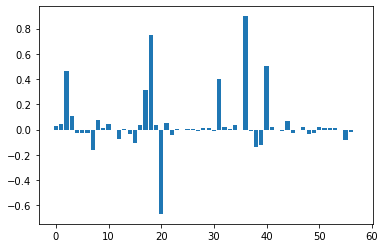

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot
model = LinearRegression()
model.fit(features_X,label_Y )
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([features_X for features_X in range(len(importance))], importance)
pyplot.show()

In [68]:
healthDataTesting_scaled = my_pipeline.transform(healthDataTesting)

In [69]:
healthDataTesting_scaled_df = pd.DataFrame(healthDataTesting_scaled,columns=healthDataTesting.columns)
test_features_X = healthDataTesting_scaled_df[list(features)]
test_label_Y = healthDataTesting_scaled_df[pred_labels]

In [70]:
testdata = test_features_X.iloc[:]

In [71]:
testLabels = test_label_Y.iloc[:]

In [72]:
model.predict(testdata)

array([[ 2.27012042e+00],
       [-1.56271452e+00],
       [ 1.78205027e-03],
       [ 1.66683160e-01],
       [-3.27164072e-01],
       [-1.09088300e+00],
       [-9.71667615e-01],
       [-5.86769577e-01],
       [ 2.30861373e+00],
       [-1.12542442e-01],
       [ 2.44929044e+00],
       [-8.87364178e-01],
       [ 4.01767240e+00],
       [ 1.13828293e+00],
       [ 6.52772048e-01],
       [-1.62939912e+00],
       [-8.99250817e-01],
       [-1.59023702e+00],
       [ 2.85188209e-01],
       [-3.39951668e-01],
       [ 9.41193781e-01],
       [-1.15093731e-01],
       [ 4.04152861e-01],
       [ 1.63590120e-01],
       [-8.21679008e-01],
       [ 1.68033321e+00],
       [-1.52956366e+00],
       [ 5.63818606e-01],
       [-4.63381517e-01],
       [-6.46872125e-01],
       [ 9.99555950e-01],
       [-1.62301003e+00],
       [ 1.65432153e-01],
       [-5.94713390e-01],
       [-1.15300872e+00],
       [-1.24331876e+00],
       [-5.28691242e-02],
       [ 8.29389033e-01],
       [ 6.0

In [73]:
testLabels

,Premature death raw value
0,2.350389
1,-1.398452
2,0.135792
3,0.339458
4,-0.313331
...,...
612,1.687875
613,-0.184461
614,-1.433718
615,0.355335


# DecisionTreeRegressor
## Model 2

Feature: 0, Score: 0.03059
Feature: 1, Score: 0.04258
Feature: 2, Score: 0.45983
Feature: 3, Score: 0.10613
Feature: 4, Score: -0.02792
Feature: 5, Score: -0.02356
Feature: 6, Score: -0.02742
Feature: 7, Score: -0.15872
Feature: 8, Score: 0.07353
Feature: 9, Score: 0.01539
Feature: 10, Score: 0.04437
Feature: 11, Score: -0.00209
Feature: 12, Score: -0.07373
Feature: 13, Score: 0.00200
Feature: 14, Score: -0.03763
Feature: 15, Score: -0.10811
Feature: 16, Score: 0.03944
Feature: 17, Score: 0.31668
Feature: 18, Score: 0.74485
Feature: 19, Score: 0.03439
Feature: 20, Score: -0.66756
Feature: 21, Score: 0.05202
Feature: 22, Score: -0.04007
Feature: 23, Score: 0.00318
Feature: 24, Score: -0.00156
Feature: 25, Score: 0.00080
Feature: 26, Score: 0.00554
Feature: 27, Score: -0.01219
Feature: 28, Score: 0.01052
Feature: 29, Score: 0.01126
Feature: 30, Score: -0.01049
Feature: 31, Score: 0.40240
Feature: 32, Score: 0.02028
Feature: 33, Score: 0.00229
Feature: 34, Score: 0.03716
Feature: 35, Scor

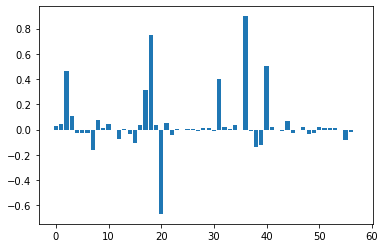

In [74]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(features_X,label_Y )
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([features_X for features_X in range(len(importance))], importance)
pyplot.show()

In [75]:
model2.predict(testdata)

array([ 2.28422707e+00, -1.38093336e+00, -2.63541599e-02,  1.94490684e-01,
       -3.68827745e-01, -8.78912613e-01, -8.59743609e-01, -5.18693740e-01,
        2.86823185e+00, -2.40388902e-01,  3.26191734e+00, -8.25162540e-01,
        3.00186216e+00,  6.96150209e-01,  1.84028252e+00, -1.51579473e+00,
       -3.48362040e-01, -1.58956326e+00,  3.66468386e-01, -1.37029377e-01,
        1.13603383e+00, -5.09647254e-01,  6.26539430e-01,  3.75229712e-02,
       -7.18103596e-01,  1.46306827e+00, -1.40361990e+00,  1.21902491e-01,
       -3.24607365e-01, -1.01181712e+00,  1.11072212e+00, -1.68858774e+00,
        2.76441740e-01, -6.06449541e-01, -1.21041371e+00, -1.09911110e+00,
        1.42907226e-01,  6.84907564e-01,  8.66197981e-02,  6.26585996e-01,
        2.43454975e+00, -1.13949998e+00,  1.49010412e+00,  1.19486905e+00,
       -1.03045752e+00,  5.00663324e-01, -1.59815626e+00, -6.20221692e-01,
       -6.17664580e-02, -1.99469485e+00, -7.16846459e-01, -1.82724098e-01,
        1.07157455e-01,  

In [76]:
testLabels

,Premature death raw value
0,2.350389
1,-1.398452
2,0.135792
3,0.339458
4,-0.313331
...,...
612,1.687875
613,-0.184461
614,-1.433718
615,0.355335


### From the models, we can confirm from feature importance values

## Following are the top 5 factors influencing premature death :
### 1) 'Premature age-adjusted mortality raw value', 
### 2) 'Frequent physical distress raw value', 
### 3) 'Frequent mental distress raw value', 
### 4) 'Food insecurity raw value', 
### 5) 'Children in poverty raw value'

# Q.4)  Evaluating Accuracy of Model Using Mean_Squared_Error

In [77]:
from sklearn.metrics import mean_squared_error
prematureDeath_pridiction_DTR = model2.predict(testdata)
DTR_mse = mean_squared_error(testLabels,prematureDeath_pridiction_DTR)
DTR_rmse = np.sqrt(DTR_mse)
DTR_rmse

0.5105507012737939

In [78]:
# Reference: https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
from sklearn.metrics import mean_squared_error
prematureDeath_pridiction = model.predict(testdata)
lin_mse = mean_squared_error(testLabels,prematureDeath_pridiction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.3010649405491851

### From the Mean squared Error, can see that Liner Regression Model gives 35% error whereas Decision Tree Model gives 47% Error. 
### Thus, Linear Regression is more suitable and efficient for this data.

# Using Cross Validation to determine OverFitting

In [79]:
# Reference : https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
from sklearn.model_selection import cross_val_score
scores_DTR = cross_val_score(model2,testdata,testLabels,scoring= "neg_mean_squared_error",cv = 10)
rmse_scores_DTR = np.sqrt(-scores_DTR)

In [80]:
rmse_scores_DTR

array([0.84444346, 0.4836972 , 0.34156777, 0.35264191, 0.35168175,
       1.18209214, 0.35859633, 0.44990548, 0.32206206, 0.40278806])

In [81]:
# Reference : https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
from sklearn.model_selection import cross_val_score
scores_lin = cross_val_score(model,testdata,testLabels,scoring= "neg_mean_squared_error",cv = 10)
rmse_scores_lin = np.sqrt(-scores_lin)

In [82]:
rmse_scores_lin

array([0.29715994, 0.47922127, 0.27711281, 0.29708791, 0.25465425,
       0.62158352, 0.27409331, 0.28440319, 0.22909227, 0.29730158])

### Using Cross Validation we get that there isn't much of signficant difference between values.
### Hence, there isn't overfitting of the data happening.

# Q.4) Recommendations for reducing premature death in Allegheny County
    Life expectancy should be increased
    Premature age-adjusted mortality should be decreased
    Frequent physical distress should be decreased
    Frequent mental distress should be Decreased
    Food insecurity should be decreased
    Ratio of Children in poverty should increase
    Median household income should Increase
    Adult smoking should decrease
    Teen births should decrease

In [83]:
features = ['Name','Life expectancy raw value',
    'Food environment index raw value',
'Median household income raw value',
    'Premature age-adjusted mortality raw value',
'Frequent physical distress raw value' ,
'Frequent mental distress raw value'  ,                        
'Children in poverty raw value'  ,                              
'Food insecurity raw value'   ,                                
'Adult smoking raw value'  ,                                    
'Teen births raw value' ,                                        
    
]
healthData = healthData.drop(index=0)
df = healthData[features]
features

['Name',
 'Life expectancy raw value',
 'Food environment index raw value',
 'Median household income raw value',
 'Premature age-adjusted mortality raw value',
 'Frequent physical distress raw value',
 'Frequent mental distress raw value',
 'Children in poverty raw value',
 'Food insecurity raw value',
 'Adult smoking raw value',
 'Teen births raw value']

In [84]:
df1 = df[features[1:]]
df1 =df1.astype(np.float64,errors='ignore')
df1.describe()


,Life expectancy raw value,Food environment index raw value,Median household income raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Children in poverty raw value,Food insecurity raw value,Adult smoking raw value,Teen births raw value
count,3125.000000,3175.000000,3193.000000,3133.000000,3194.000000,3194.000000,3193.000000,3194.000000,3194.000000,3021.000000
mean,77.533130,7.445543,55874.761979,408.102737,0.136037,0.150821,0.199031,0.131786,0.212555,27.831473
std,3.116638,1.152690,14493.345229,114.618763,0.026248,0.023708,0.084649,0.037461,0.041754,13.405725
min,64.412891,0.000000,24732.000000,128.702216,0.070136,0.088372,0.024000,0.036000,0.070756,2.098695
25%,75.564878,6.900000,46309.000000,327.886550,0.116351,0.133319,0.136000,0.106000,0.185358,17.929910
50%,77.566092,7.600000,53505.000000,395.496015,0.134140,0.150546,0.186000,0.129000,0.210333,26.315789
75%,79.449242,8.200000,62327.000000,479.499438,0.153390,0.167016,0.248000,0.156000,0.239939,36.228721
max,113.462137,10.000000,151806.000000,1107.494766,0.291920,0.246691,0.634000,0.304000,0.445719,97.272429


In [85]:
d = df.loc[df['Name'] == 'Allegheny County']

In [86]:
d


,Name,Life expectancy raw value,Food environment index raw value,Median household income raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Children in poverty raw value,Food insecurity raw value,Adult smoking raw value,Teen births raw value
2286,Allegheny County,78.070974478,8.2,64799,368.23328013,0.1100910936,0.1390961849,0.141,0.106,0.1848435322,12.050499611


In [87]:
!jupyter nbconvert --to html DSPM_HW2_ksolapur.ipynb

[NbConvertApp] Converting notebook DSPM_HW2_ksolapur.ipynb to html
[NbConvertApp] Writing 1674293 bytes to DSPM_HW2_ksolapur.html
